<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Eksik Değer Nedir ?
</h1>

#### *-Eksik değer adından da anlaşılacağı üzere sahip olmayı beklediğimiz fakat sahip olamadığımız değerdir.*
#### *-Verilerdeki boş hücrelerdir*
#### *-Eksik değerlerin literatürdeki ismi Not A Number'dır*
#### *-Python'da ise NaN olarak görülür  fakat bazı veri toplayan , verileri düzenleyen insanlar bu verileri nasıl adlandıracağını bilmediği için N/A , None , 999999 vs gibi adlandırabilirler.*


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Eksik Değerler Neden Vardır ?
</h1>

#### *1-İnsan hataları*
#### *2-Katılımcıların anketteki soruyu reddetmeleri.*
#### *3-Katılımcıların soruyu anlamamaları*
#### *4-Veri setinden değerin bilerek silinmesi*
#### *5-Katılımcının soruyu cevaplamak için yeterli vaktinin olmaması*
#### *6-Veri tabanından kaynaklı sorundan dolayı verinin silinmesi*
#### *7-Kötü niyetli kişilerin bilerek silmesi*
#### *8-Sensör hataları*
#### *9-Program bugları* 
#### *10-Gözlemlerin atlanması gibi gibi bir çok neden vardır.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> Python'da eksik değerleri bulmak için :
</h1>

In [109]:
import warnings
import pandas as pd
pd.set_option("display.max_columns",None)
warnings.filterwarnings('ignore')


In [37]:
df = pd.read_csv("Airdata.csv")

In [38]:
df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70


#### *İlk komut df.info()*

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


#### *2.Komut*

In [40]:
print("Sütunlardaki Eksik Değer Sayıları")
for col in df.columns:
    n_nan = sum(df[col].isna())
    print('{}:{}'.format(col,n_nan))

Sütunlardaki Eksik Değer Sayıları
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


#### *3.Komut (2.komutun df'li metodu)*

In [41]:
df.isnull().sum()

DateTime            0
Temperature         0
Humidity            0
Wind_Speed          0
Wind_Direction      0
NO2_Location_A    120
NO2_Location_B    580
NO2_Location_C    132
dtype: int64

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;color:#FFFFFF"> Eksik Değer Tipleri
</h1> 

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;color:#FFFFFF"> MCAR : (Missing Completely at Random - Tamamen Rasgele Eksiklik) 
</h1> 

#### *Eksik verilerin hiçbir nedeninin olmadığı durumdur. Bu durumda eksil veriler rastgele veri setinden kaybolur. Gözlem birimleri arasında herhangi bir ilişkinin olmadığını gösterir*

#### *Örneğin öğrenci anketinde, öğrencilere bir anket uygulanıyor ve anket, öğrencilerin isimlerini, yaşlarını, en sevdikleri dersi ve favori renklerini sormaktadır. Ancak bazı öğrenciler anketi tamamlamayı reddediyorlar veya unutuyorlar. MCAR , bu eksikliklerin rastgele ve tahmin edilemez bir şekilde meydana geldiği bir durumu ifade eder. Yani, öğrencilerin anketi tamamlamama nedenleriyle ilgili belirgin bir ilişki veya sebep yok.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;color:#FFFFFF"> MAR (Missing at Random - Rasgele Eksiklik):
</h1> 

#### *Eksik verilerin başka değişkenlere bağlı olarak oluştuğu durumdur . Eksik değerler , diğer değerlere bağlı olarak meydana gelir . Mar eksik değerin rastegele olmadığını ancak eksiklik nedeninin diğer gözlemlenen verilerle ilişkili olduğunu gösterir.*

#### *Örneğin bir online ankete katılan bazı katılımcıların yaş , gelir gibi değerleri doldurmamaları bir MAR durumu örneğidir.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;color:#FFFFFF"> MNAR (Missing Not at Random - Rasgele Olmayan Eksiklik):
</h1> 

#### *Eksik değerlerin diğer gözlemlenen verilere bağlı olarak oluştuğu ve bu eksikliklerin belirgin bir nedeni olduğu durumdur. MNAR durumundaki eksik değerler eksiklik nedenine bağlı olarak değişir.*
#### *Örneğin bir sağlık araştırmasında araştırmacılar , hastaların kilo durumunu ve depresyon seviyelerini ölçüyorlar . Bazı hastalar kilo bilgilerin vermeyi red ediyor fakat kilo seviyesiyle depresyon seviyesinin ilişkili olduğunu varsayarsak kilo bilgilerini vermeyen insanların kilo problemi olduğunu düşünebiliriz .*

#### *MCAR durumu verilerin doğrudan analiz edilmesine izin verirken diğer durumlarda eksik değerin nedeninini tahmin etmek ve modele eklemek gerekebilir.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> Sıcaklığa bağlı olarak eksik değerlerin tespiti
</h1>

In [42]:
import matplotlib.pyplot as plt

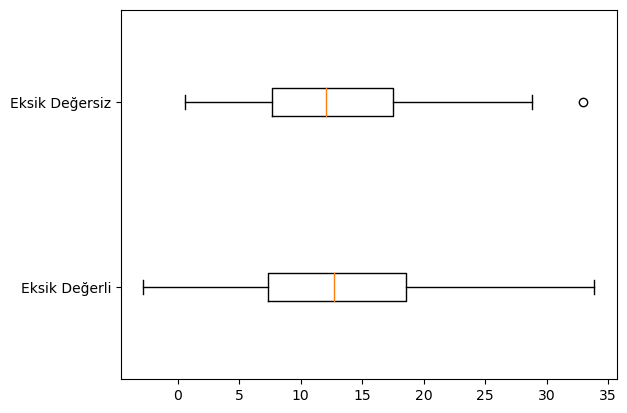

In [43]:
BM_MV = df.NO2_Location_A.isna()
MV_Labels = ["Eksik Değerli","Eksik Değersiz"]
box_sr = pd.Series('',index = BM_MV.unique())
for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = df[BM].Temperature
    
plt.boxplot(box_sr, vert=False)
plt.yticks([1, 2], MV_Labels)
plt.show()

#### !*Sıcaklık değerine baktığımızda sıcaklığın iki populasyon için de anlamlı bir değişikliğe neden olmadığını görebiliriz.*

##### Diyagram ile eksik değerli ve eksik değersiz görsel oluşturalım.

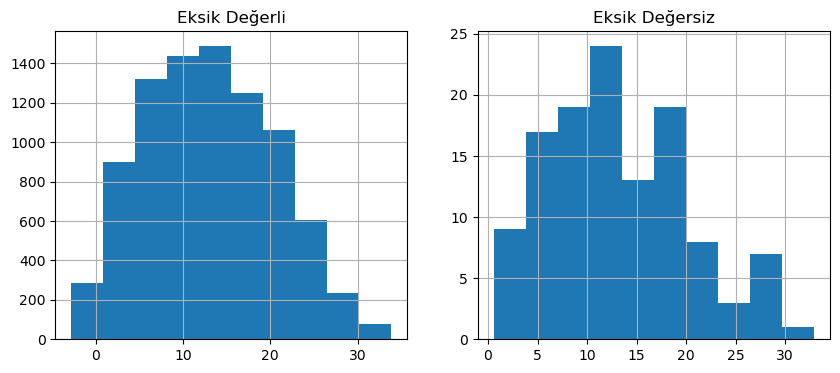

In [44]:
BM_MV = df.NO2_Location_A.isna()
temp_range = (df.Temperature.min(),df.Temperature.max())
MV_Labels = ["Eksik Değerli","Eksik Değersiz"]
plt.figure(figsize=(10,4))
for i , poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_Labels[i])
plt.show()

#### Boxplotta olduğu gibi histogramda da sıcaklık değişkeninin eksik değerleri etkilemediğini gördük

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> İki örneklem t testi iki grup arasında anlamlı bir farklılık olup olmadığını açıklar.
</h1> 

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> H0 : Gruplar arasında anlamlı bir farklılık vardır.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> H0 : Gruplar arasında anlamlı bir farklılık yoktur.
</h1>

In [45]:
from scipy.stats import ttest_ind
BM_MV = df.NO2_Location_A.isna()
ttest_ind(df[BM_MV].Temperature,df[~BM_MV].Temperature)

TtestResult(statistic=0.05646499065315542, pvalue=0.9549726689684548, df=8782.0)

#### p-value değeri 0.05'den büyük çıktığı için H0 hipotezi red edilemez yani gruplar arasında bir farklılık yoktur.

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;color:#FFFFFF"> Eksik değerlerin bütün sayısal değerlere göre tespit edilmesi
</h1>


In [46]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'Eksik Değerli',False:'Eksik Değersiz'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('t-testi p-value sonucu: {}'.format(p_value))
    if p_value > 0.05:
        print("Hipotez red edilemez . Anlamlı bir farklılık yoktur")
    else:
        print("Hipotez red edilemez . Anlamlı bir farklılık vardır")


Temperature için eksik değerlerin teşhisi:


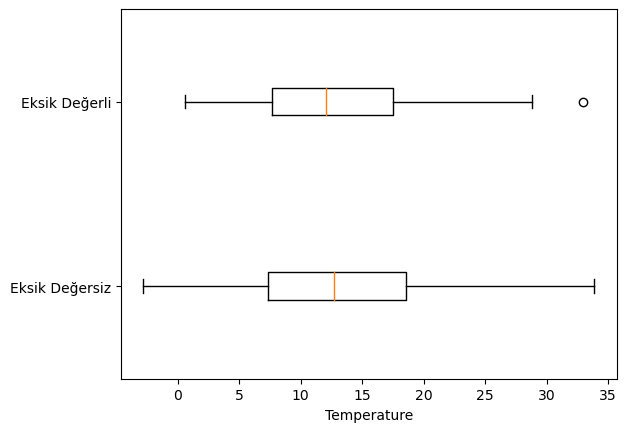

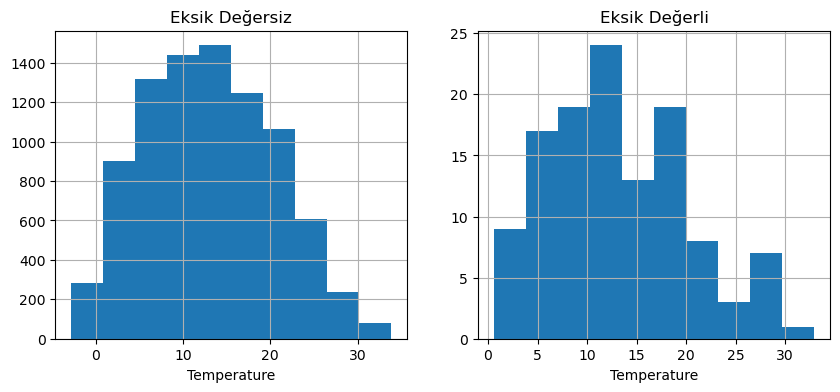

t-testi p-value sonucu: 0.9549726689684548
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 
Humidity için eksik değerlerin teşhisi:


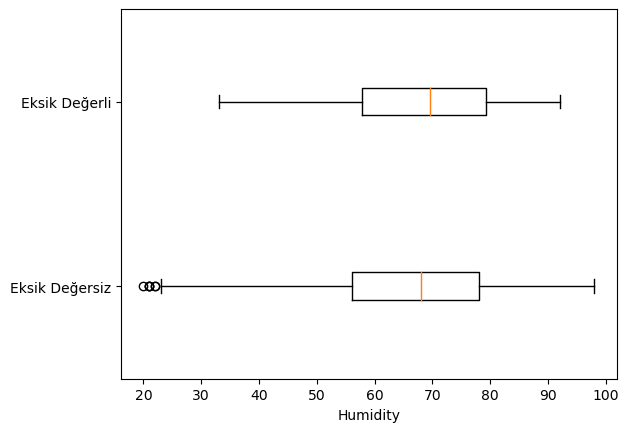

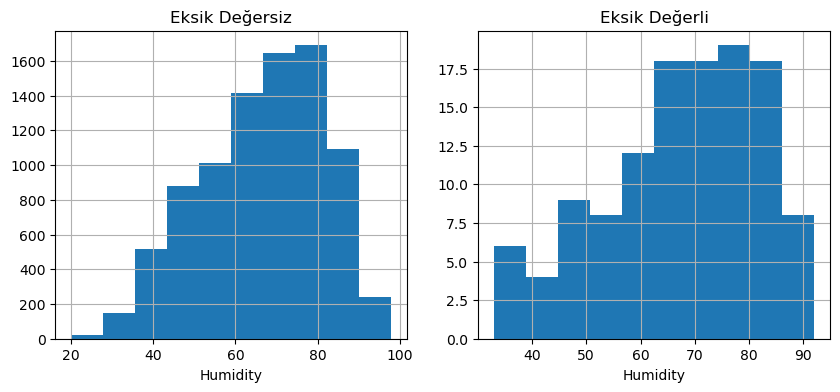

t-testi p-value sonucu: 0.5593319830352679
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 
Wind_Speed için eksik değerlerin teşhisi:


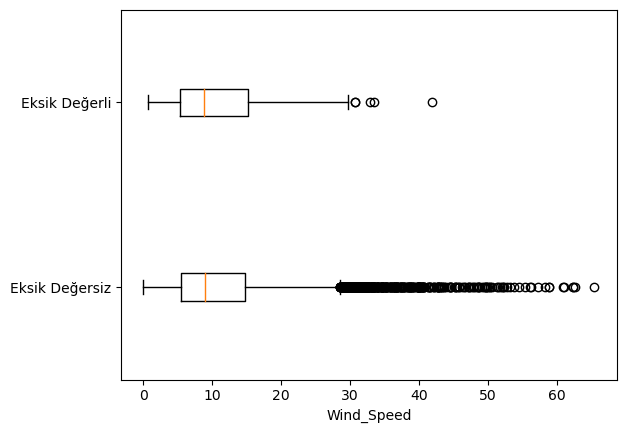

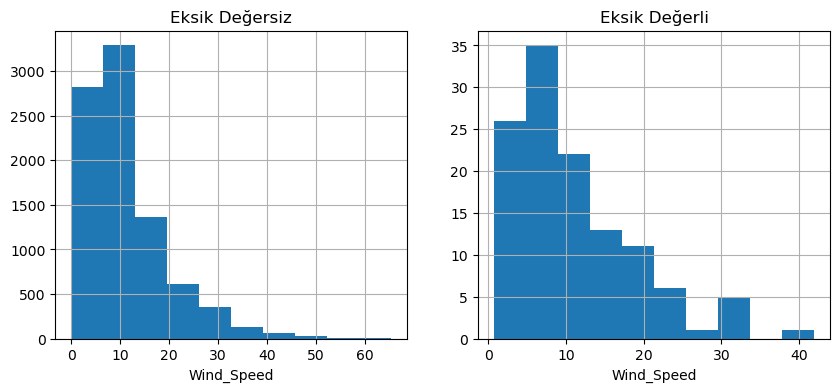

t-testi p-value sonucu: 0.8172472856083665
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 
Wind_Direction için eksik değerlerin teşhisi:


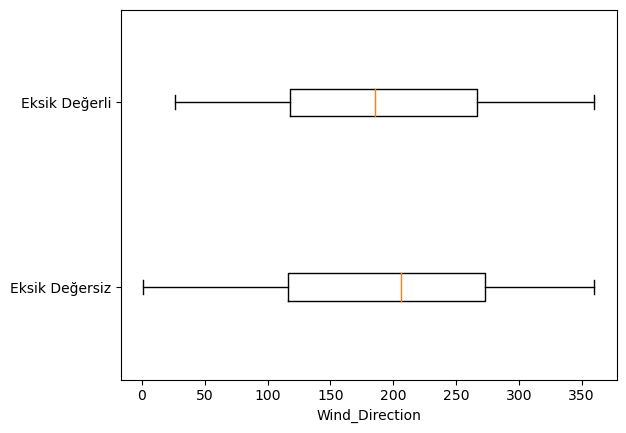

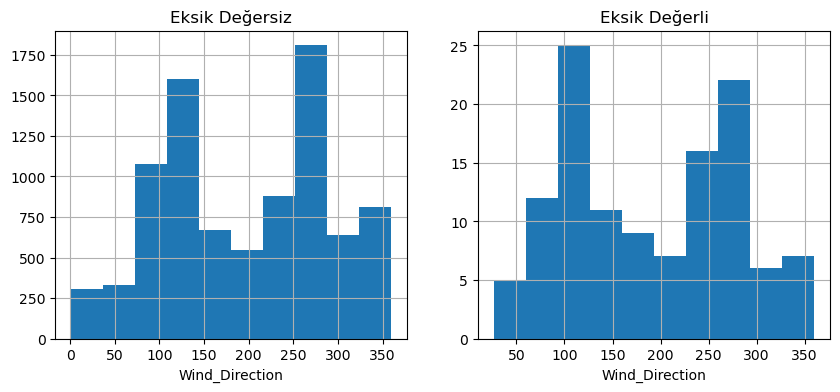

t-testi p-value sonucu: 0.39869195396670654
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 


In [47]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('{} için eksik değerlerin teşhisi:'.format(att))
    Diagnose_MV_Numerical(df,att,BM_MV)
    print('* * * * * * *  * * * * * * * ')

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF"> Eksik değerlerin haftanın günlerine göre tespiti
</h1>

In [48]:
df.DateTime = pd.to_datetime(df.DateTime)
df['month'] = df.DateTime.dt.month
df['day'] = df.DateTime.dt.day
df['hour'] = df.DateTime.dt.hour
df['weekday'] = df.DateTime.dt.day_name()

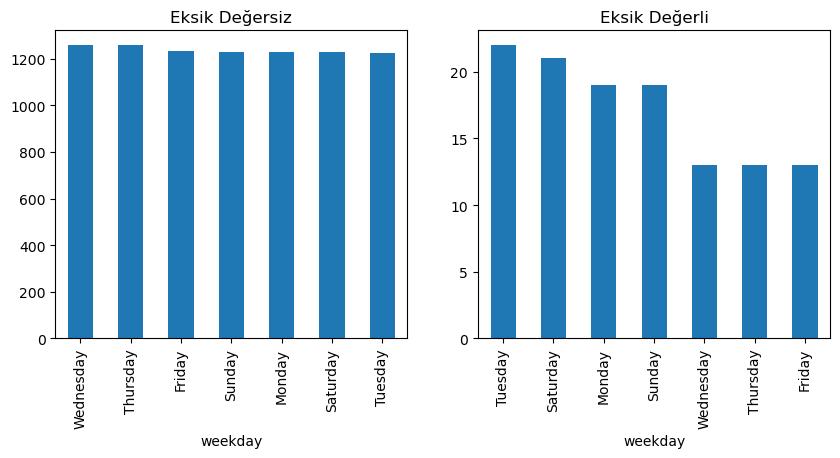

In [49]:
BM_MV = df.NO2_Location_A.isna()
MV_labels = ['Eksik Değersiz','Eksik Değerli']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()


#### Barplota baktığımız zaman eksik verilerin rasgele oluştuğunu gözlemleyebiliriz. Eksik değerlerin sistematik , örüntülü bir şekilde oluşmadığını söyleyebiliriz. 

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;color:#FFFFFF">  Chi-square testini kullanarak bu tanımı yapabiliriz. Bu test eksik değerlerin oluşması ile haftanın günü ile arasında bir ilişki olup olmadığını test eder
</h1>


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;color:#FFFFFF">   H0 : Eksik değerlerin oluşması ile haftanın günü arasında anlamlı bir ilişki yoktur.
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;color:#FFFFFF">   H1 : Eksik değerlerin oluşması ile haftanın günü arasında anlamlı bir ilişki vardır.
</h1>


In [50]:
from scipy.stats import chi2_contingency 
BM_MV = df.NO2_Location_A.isna()
contingency_table = pd.crosstab(BM_MV,df.weekday)

In [51]:
contingency_table


weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [52]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=6.048964133655503, pvalue=0.41772751510388023, dof=6, expected_freq=array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
        1254.62295082, 1230.95081967, 1254.62295082],
       [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
          17.37704918,   17.04918033,   17.37704918]]))

#### p-value değerimiz 0.05'den büyük olduğu için H0 red edilemez yani eksik değerlerin oluşması ile haftanın günü arasında anlamlı bir ilişki yoktur.

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;color:#FFFFFF">   Eksik Değerlerin Bütün Kategorik Değişkenlere Göre Tespit Edilmesi
</h1>

In [53]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'Eksik Değerli',False:'Eksik Değersiz'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('Ki Kare Testi p-value değeri: {}'.format(p_value))
    if p_value > 0.05:
        print("Hipotez red edilemez . Anlamlı bir ilişki yoktur")
    else:
        print("Hipotez red edilemez . Anlamlı bir ilişki vardır")


#### NO2_Location_B değişkeni için yukarıda yazdığımız fonksiyonları kullanarak tespit etmeye çalışalım.

Temperature için eksik değerlerin teşhisi:


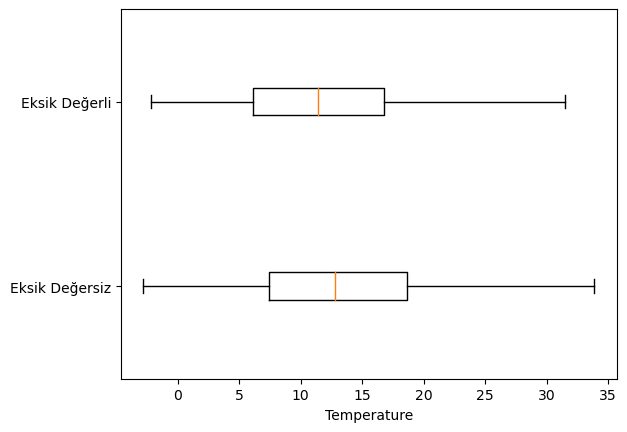

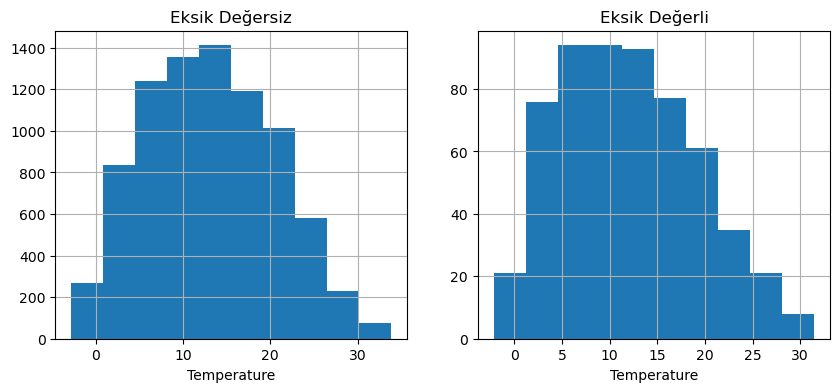

t-testi p-value sonucu: 0.00018958810621204925
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
Humidity için eksik değerlerin teşhisi:


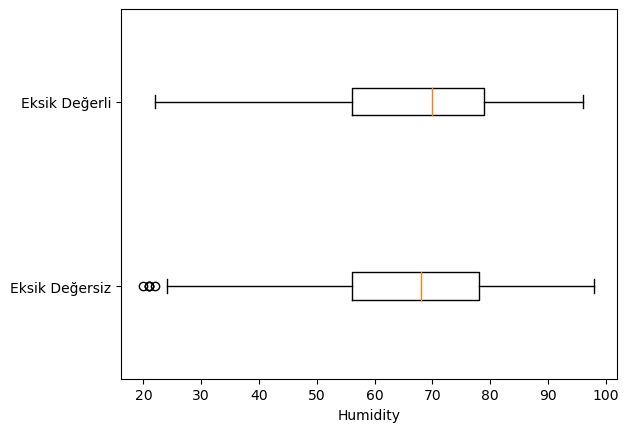

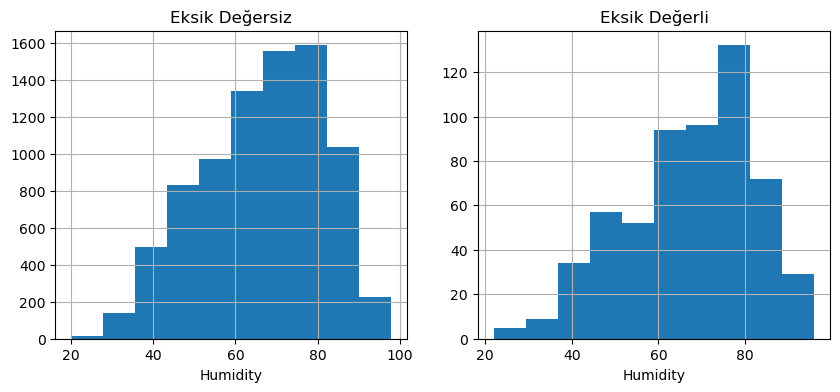

t-testi p-value sonucu: 0.43891454332709945
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 
Wind_Speed için eksik değerlerin teşhisi:


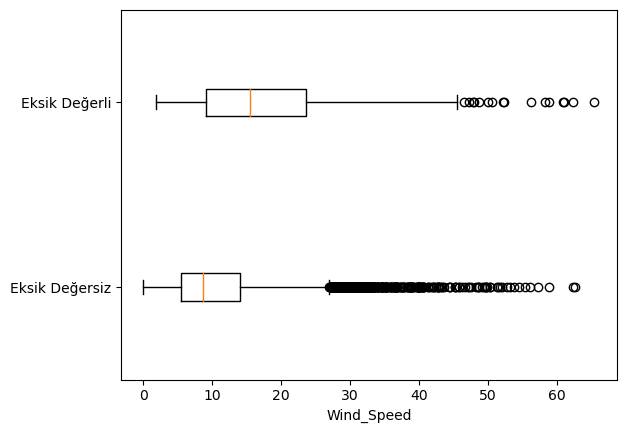

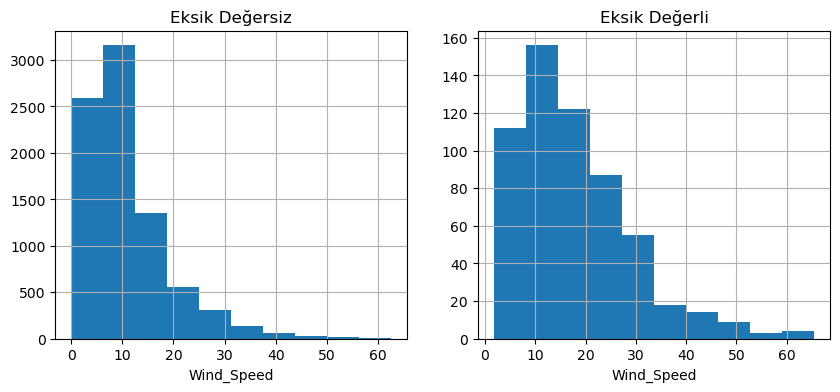

t-testi p-value sonucu: 1.3126894108159327e-85
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
Wind_Direction için eksik değerlerin teşhisi:


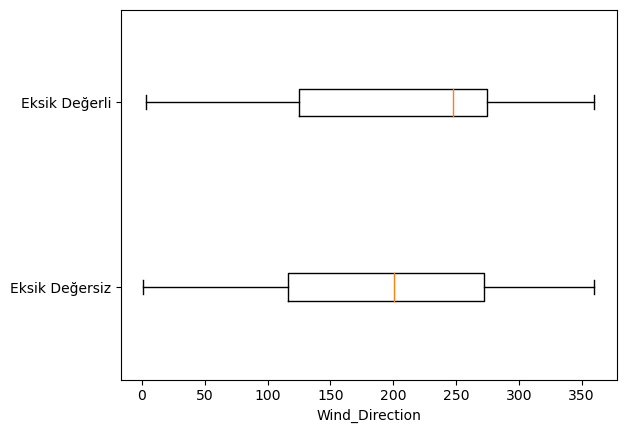

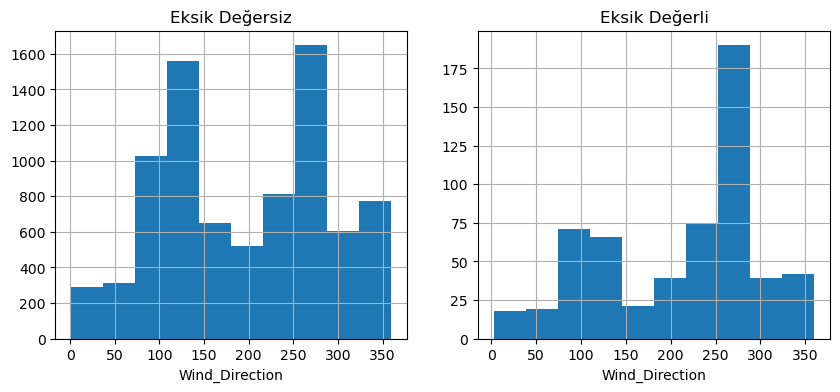

t-testi p-value sonucu: 5.8398056632254833e-05
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
month için eksik değer tespiti:


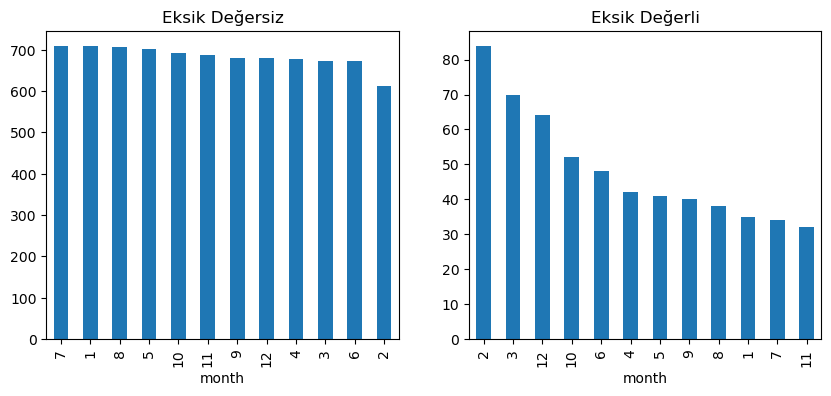

Ki Kare Testi p-value değeri: 1.8048364819875927e-10
Hipotez red edilemez . Anlamlı bir ilişki vardır
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
day için eksik değer tespiti:


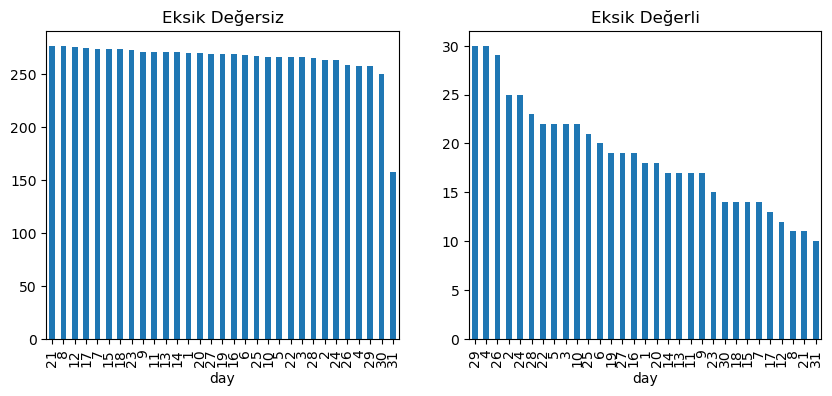

Ki Kare Testi p-value değeri: 0.034816691411564224
Hipotez red edilemez . Anlamlı bir ilişki vardır
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
hour için eksik değer tespiti:


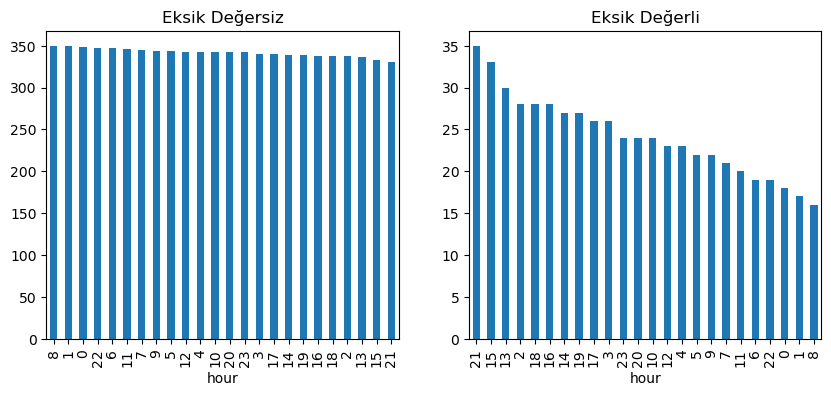

Ki Kare Testi p-value değeri: 0.3949474320151337
Hipotez red edilemez . Anlamlı bir ilişki yoktur
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
weekday için eksik değer tespiti:


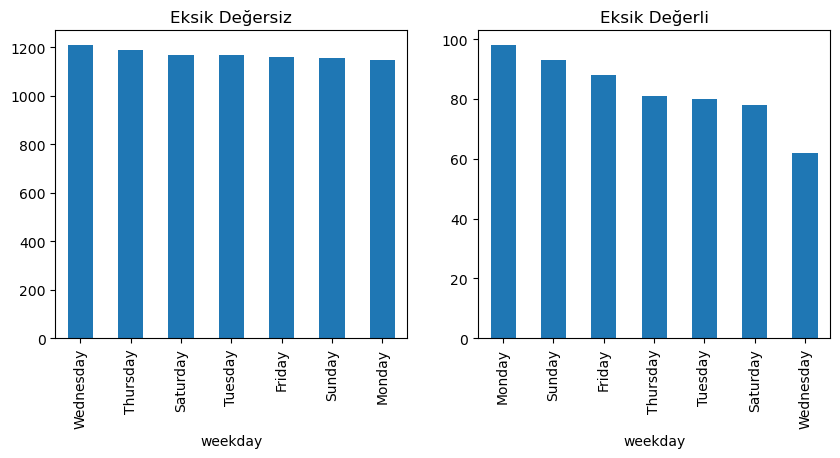

Ki Kare Testi p-value değeri: 0.07073083108612685
Hipotez red edilemez . Anlamlı bir ilişki yoktur
- - - - - - - - - - - - - - -  - - - - - - - - - - - 


In [54]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = df.NO2_Location_B.isna()

for att in numerical_attributes:
    print('{} için eksik değerlerin teşhisi:'.format(att))
    Diagnose_MV_Numerical(df,att,BM_MV)
    print('* * * * * * *  * * * * * * * ')
    
for att in categorical_attributes:
    print('{} için eksik değer tespiti:'.format(att))
    Diagnose_MV_Categorical(df,att,BM_MV)
    print('- - - - - - - - - - - - - - -  - - - - - - - - - - - ')

#### ! NO2_Location_B değişkeni içindeki eksik değerlerin neden meydana geldiğini artık biliyoruz . Sıcaklık değeri eksik verilerin oluşma olasılığını arttırır . Bu nedenle eksik verilerin MAR tipinde olduğunu söyleyebiliriz.

#### NO2_Location_C değişkeni için eksik değer tespiti

Temperature için eksik değerlerin teşhisi:


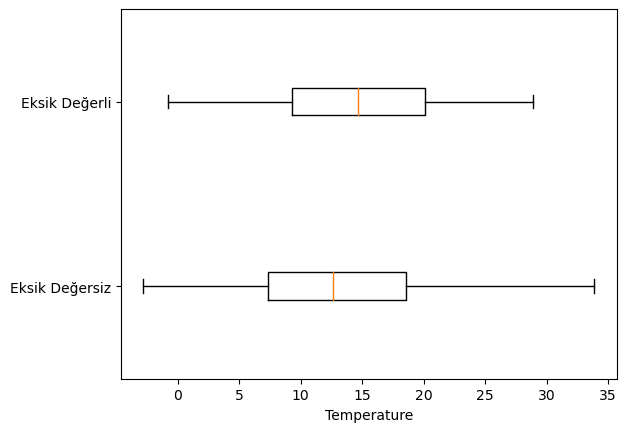

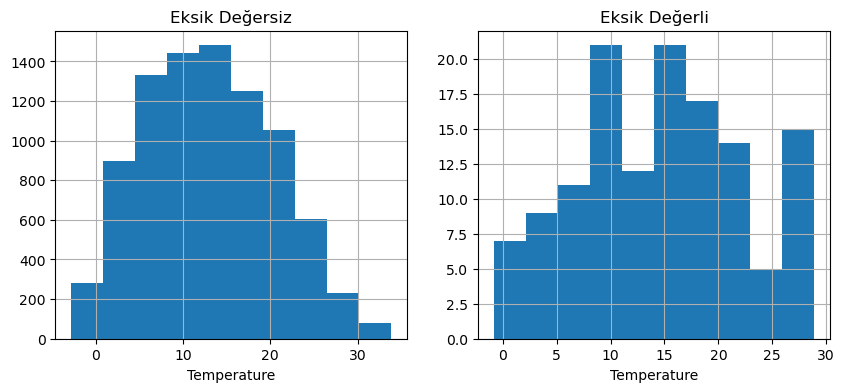

t-testi p-value sonucu: 0.01981913552818646
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
Humidity için eksik değerlerin teşhisi:


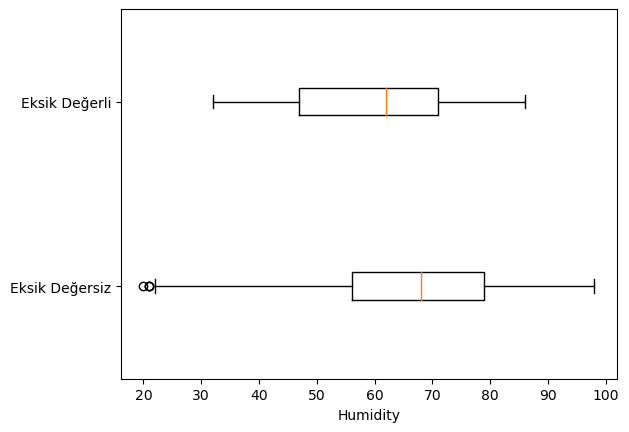

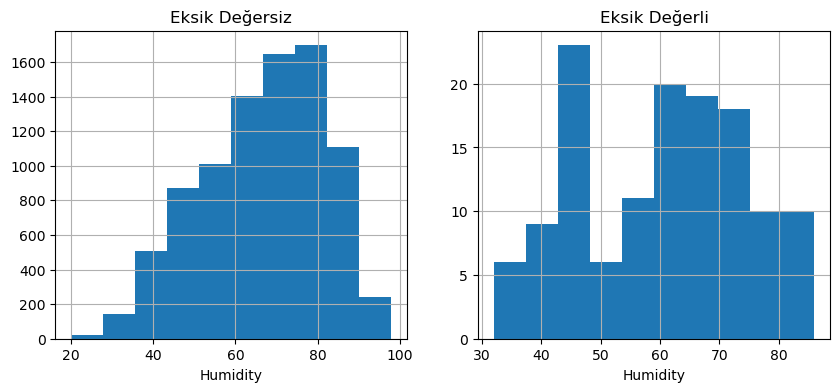

t-testi p-value sonucu: 8.179400599849167e-07
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
Wind_Speed için eksik değerlerin teşhisi:


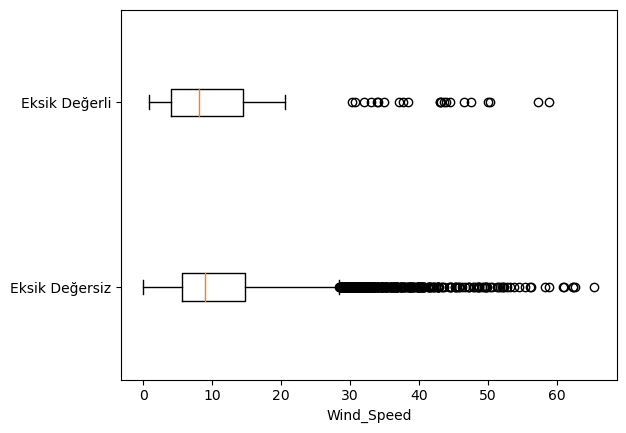

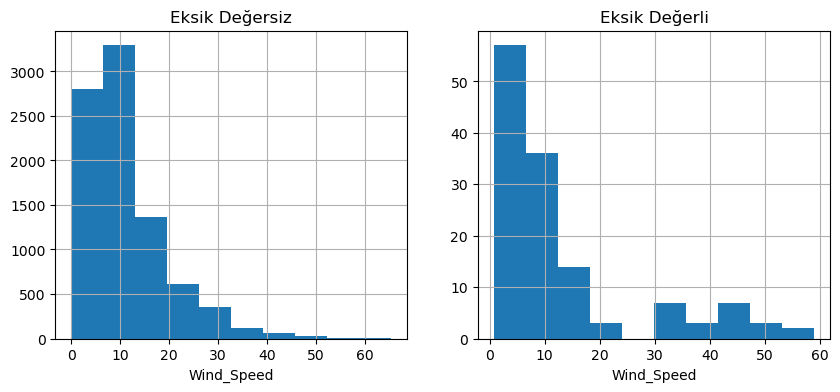

t-testi p-value sonucu: 0.01359796253829262
Hipotez red edilemez . Anlamlı bir farklılık vardır
* * * * * * *  * * * * * * * 
Wind_Direction için eksik değerlerin teşhisi:


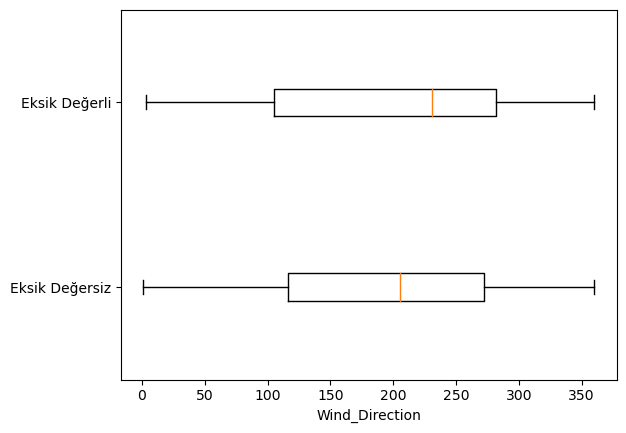

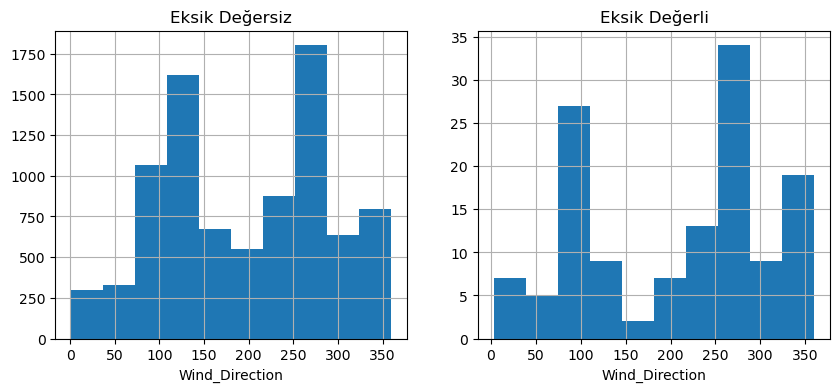

t-testi p-value sonucu: 0.3083081973623661
Hipotez red edilemez . Anlamlı bir farklılık yoktur
* * * * * * *  * * * * * * * 
month için eksik değer tespiti:


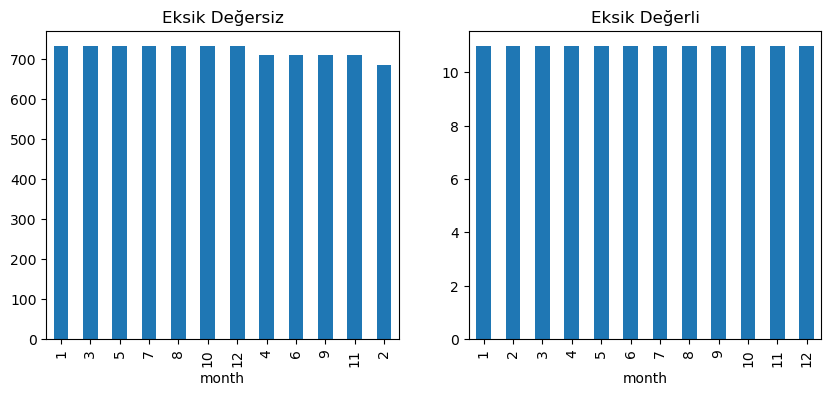

Ki Kare Testi p-value değeri: 0.9999999999839941
Hipotez red edilemez . Anlamlı bir ilişki yoktur
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
day için eksik değer tespiti:


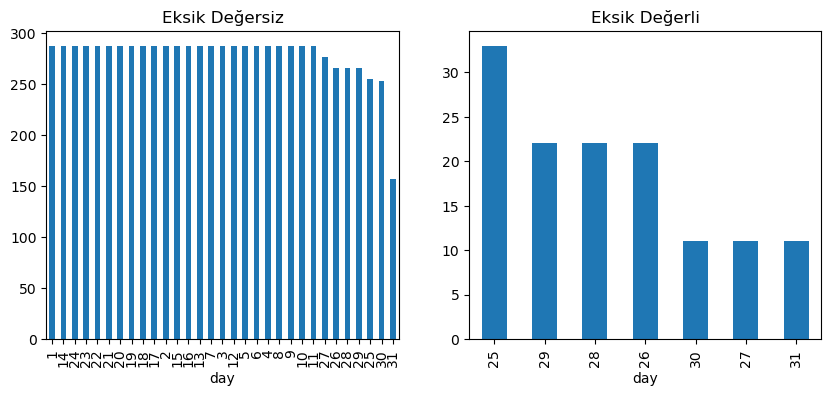

Ki Kare Testi p-value değeri: 4.5607973056357013e-101
Hipotez red edilemez . Anlamlı bir ilişki vardır
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
hour için eksik değer tespiti:


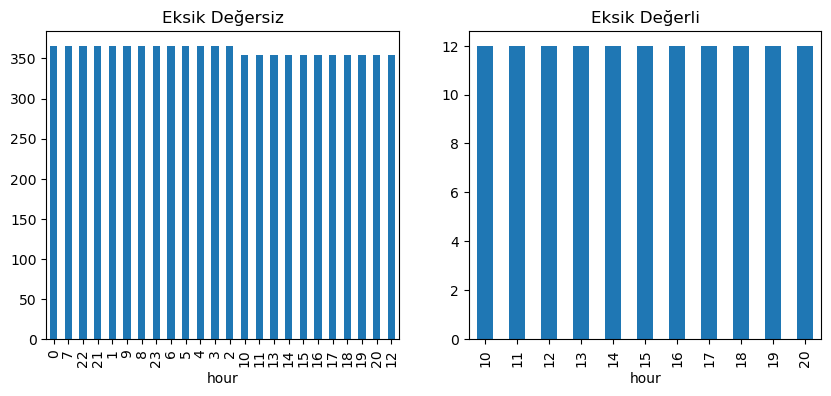

Ki Kare Testi p-value değeri: 3.3850851028854862e-22
Hipotez red edilemez . Anlamlı bir ilişki vardır
- - - - - - - - - - - - - - -  - - - - - - - - - - - 
weekday için eksik değer tespiti:


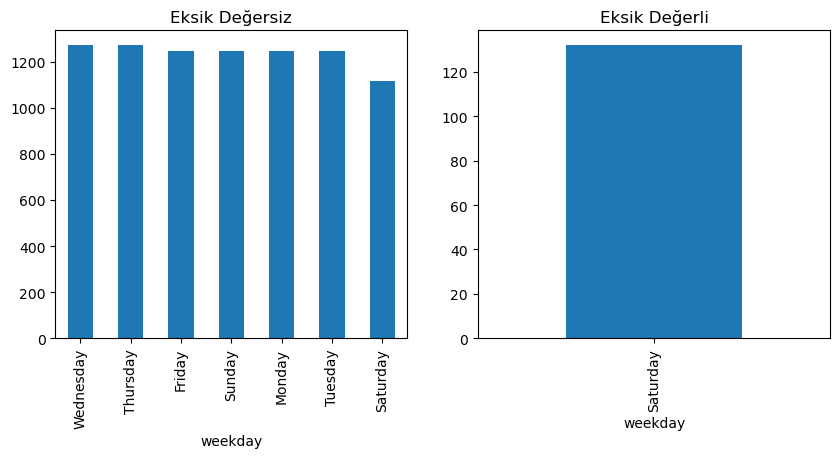

Ki Kare Testi p-value değeri: 1.554165460861991e-171
Hipotez red edilemez . Anlamlı bir ilişki vardır
- - - - - - - - - - - - - - -  - - - - - - - - - - - 


In [55]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = df.NO2_Location_C.isna()

for att in numerical_attributes:
    print('{} için eksik değerlerin teşhisi:'.format(att))
    Diagnose_MV_Numerical(df,att,BM_MV)
    print('* * * * * * *  * * * * * * * ')
    
for att in categorical_attributes:
    print('{} için eksik değer tespiti:'.format(att))
    Diagnose_MV_Categorical(df,att,BM_MV)
    print('- - - - - - - - - - - - - - -  - - - - - - - - - - - ')

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;color:#FFFFFF">Eksik Değerlerle Uğraşma Yöntemleri
</h1> 

#### *-Verileri tutmak*
#### *-Eksik değere sahip satırları kaldırmak*
#### *-Eksik değere sahip sütunları kaldırmak* 
#### *-Eksik değerleri tahmin ederek doldurmak* 

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1)Verileri tutmak : 
</h1> 

#### *Hedefimiz ve kullanacağımız araçlar verileri sorunsuz bir şekilde işleyebiliyor ve bu durum eksik değerlerin analizdeki olumsuz etkilerini ortadan kaldırabiliyorsa bu yöntemi kullanabiliriz.(KNN yöntemi ile eksik verileri doldurmak)*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;color:#FFFFFF"> KNN NEDİR ? NASIL ÇALIŞIR?
</h1>

#### *K-En Yakın Komşu (KNN), en basit sınıflandırma algoritmalarından biridir . Özetle, bir veri noktasını sınıflandırmak için, etiketlenmiş diğer veri noktaları arasında benzerlik ölçülerine dayalı olarak öklid kullanarak en yakın K komşuyu bulur. Bu komşuların etiketlerini inceleyerek, yeni veri noktasının etiketini tahmin eder.*

In [133]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df.drop(columns = ['Name'],inplace=True)
applicant_df

,income,score,default
0,78479,800,NO
1,95483,801,NO
2,101641,815,NO
3,104234,790,NO
4,108726,795,NO
5,112845,750,NO
6,114114,799,NO
7,114799,801,NO
8,119147,805,NO
9,119976,790,NO


In [134]:
newApplicant = applicant_df.iloc[20]
newApplicant

income     98487
score        785
default      NaN
Name: 20, dtype: object

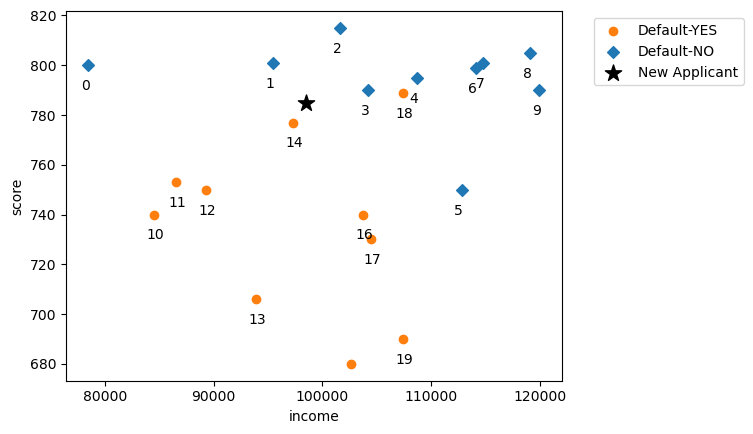

In [135]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df.drop(index = [20],inplace=True)
fig, ax = plt.subplots()

subset = applicant_df.loc[applicant_df['default']=='Yes']
ax.scatter(subset.income, subset.score, marker='o', label='Default-YES', color='C1')

subset = applicant_df.loc[applicant_df['default']=='NO']
ax.scatter(subset.income, subset.score, marker='D', label='Default-NO', color='C0')

ax.scatter(newApplicant.income, newApplicant.score, marker='*', label='New Applicant', color='black', s=150)

plt.xlabel('income')  # set x-axis label
plt.ylabel('score')  # set y-axis label

for _, row in applicant_df.iterrows():
    ax.annotate(row.Name, (row.income -700, row.score-10))
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(1.05, 1))

plt.show()

<p style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">NaN olan değerimiz 1-2,3 ve 14. indexlere yakın olduğumuz için ve 3 değerimiz NO olduğu için NO ile doldurma olasılığımız yüksektir aşağıda KNN algoritması ile tahmin sonucu gösterilecektir.
</p>


In [136]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df['income_Normalized'] = (applicant_df.income - applicant_df.income.min())/(applicant_df.income.max() - applicant_df.income.min())
applicant_df['score_Normalized'] = (applicant_df.score - applicant_df.score.min())/(applicant_df.score.max() - applicant_df.score.min())
applicant_df.drop(columns = ['Name'],inplace=True)


In [137]:
from sklearn.neighbors import KNeighborsClassifier

predictors = ['income_Normalized','score_Normalized']
target = 'default'

Xs = applicant_df[predictors].drop(index=[20])
y= applicant_df[target].drop(index=[20])

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xs, y)

newApplicant = pd.DataFrame({'income_Normalized': 
                             applicant_df.iloc[20].income_Normalized,
                             'score_Normalized': 
                             applicant_df.iloc[20].score_Normalized},
                            index = [20])
predict_y = knn.predict(newApplicant)
print(predict_y)

['NO']


In [138]:
##KNN Tuning
### K komşu sayısını bulmak için Tune edeceğiz.
applicant_df['income_Normalized'] = (applicant_df.income -applicant_df.income.min())/(applicant_df.income.max() - applicant_df.income.min())

In [139]:
applicant_df['score_Normalized'] = (applicant_df.score -
applicant_df.score.min())/(applicant_df.score.max() - applicant_df.score.min())

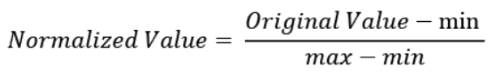

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
predictors = ['income_Normalized','score_Normalized']
target = 'default'
Xs = applicant_df[predictors].drop(index=[20])
y= applicant_df[target].drop(index=[20])

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Örnek bir KNN modeli
k_values = list(range(1, 21))
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs, y, cv=5)
    mean_scores.append(scores.mean())

best_k = k_values[mean_scores.index(max(mean_scores))]
print("En iyi n_neighbors değeri:", best_k)

En iyi n_neighbors değeri: 6


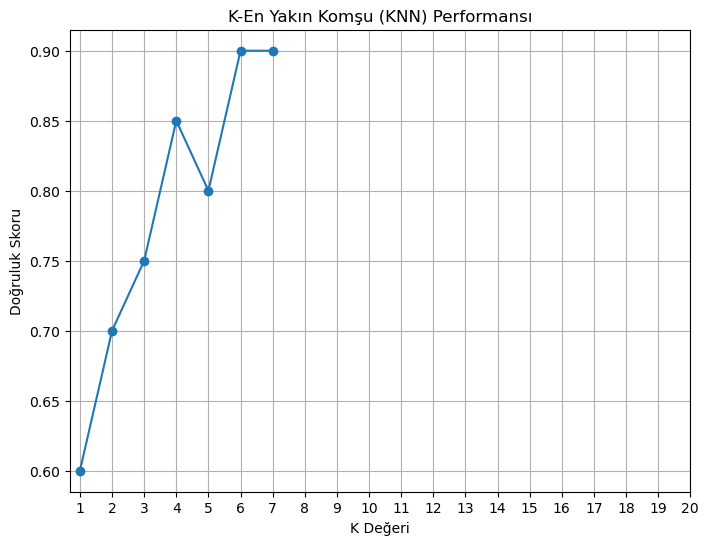

In [158]:
k_values = list(range(1, 21))

plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('K-En Yakın Komşu (KNN) Performansı')
plt.xlabel('K Değeri')
plt.ylabel('Doğruluk Skoru')
plt.xticks(k_values)
plt.grid()
plt.show()

In [143]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(Xs, y)

KNeighborsClassifier(n_neighbors=6)

In [144]:
newApplicant = pd.DataFrame({'income_Normalized':
applicant_df.iloc[20].income_Normalized,'score_Normalized':
applicant_df.iloc[20].score_Normalized},index = [20])

In [145]:
newApplicant

,income_Normalized,score_Normalized
20,0.482155,0.777778


In [146]:
predict_y = knn.predict(newApplicant)

In [147]:
print(predict_y)

['NO']


### Decision Tree


In [148]:
applicant_df = pd.read_csv('CustomerLoan.csv')
applicant_df.drop(columns = ['Name'],inplace=True)


In [149]:
newApplicant = pd.DataFrame({'income':
applicant_df.iloc[20].income,'score':
applicant_df.iloc[20].score},index = [20])

In [150]:
applicant_df.default = applicant_df.default.astype("str")

In [151]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

predictors = ['income','score']
target = 'default'

Xs = applicant_df[predictors].drop(index=[20])
y= applicant_df[target].drop(index=[20])

classTree = DecisionTreeClassifier()
classTree.fit(Xs, y)

predict_y = classTree.predict(newApplicant)
print(predict_y)

['Yes']


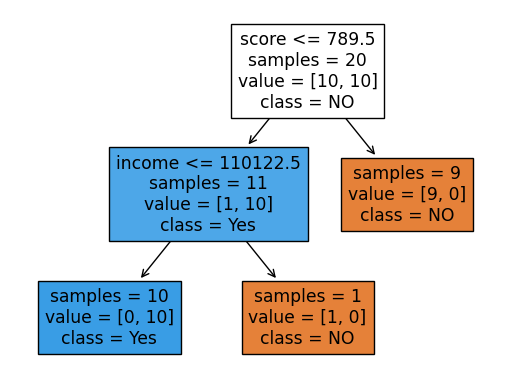

In [152]:
from sklearn.tree import plot_tree
plot_tree(classTree, 
          feature_names=predictors,  
          class_names=y.unique().tolist(),
          filled=True,
          impurity=False)
plt.show()

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2)Eksik değere sahip satırları kaldırmak </h1> 

#### *Bu metoda çok etkili bir şekilde yaklaşmak gerekir .Çünkü eksik değerimizin tipi MAR veya MNAR ise bu verileri kaldırmak verilerin anlamlı bir bölümünü kaldırmak anlamına gelir .*
#### *Eğer veri tipimiz MCAR ise ilk yöntem asla verileri temizlemek olmamalıdır , gerekli doldurma yöntemleri ile anlamlı bir şekilde doldurmaya çalışmalı sonrasında çare kalmaz ise kaldırmalıyız.*

In [96]:
df.dropna(axis=0)

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
5,2020-01-01 05:00:00,1.160529,80,3.054701,135.000000,30.35,43.18,54.20,1,1,5,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3)Eksik değere sahip sütunları kaldırmak </h1> 


#### *Eksik değerlere sahip 1 veya 2 değişken varsa ve bu değişkenler bizim analizimiz için önemli değilse kaldırmayı düşünebiliriz bunun yanında eksik değerlerimiz eğer veri setimizin %25'inden büyük ise doldurmak ya da tahmin etmek yerine direkt ortadan kaldırmalıyız.*

In [97]:
df.dropna(axis=1)

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,12,31,22,Thursday


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4)Eksik değerleri tahmin ederek ve atama ile doldurmak  </h1> 

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:125%;text-align:left;color:#FFFFFF">1)Genel merkezi eğilim ölçüleri ile doldurmak(Mod,medyan,ortalama)</h1> 

#### *Bu yöntem  MCAR tipindeki eksik değerler için daha iyidir.*


In [102]:
df.fillna(df.NO2_Location_B.mode())

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


In [100]:
df.fillna(df.NO2_Location_B.median())

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,22.75,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


In [101]:
df.fillna(df.NO2_Location_B.mean())

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.230000,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.300000,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,29.000569,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.280000,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.970000,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553680,251.565060,53.440000,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259939,186.340200,49.800000,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.320000,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820528,88,8.435069,219.805570,39.880000,19.90,43.70,12,31,22,Thursday


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:125%;text-align:left;color:#FFFFFF">2)Eksik değerleri daha alakalı bir değişkenin merkezi eğilim değerleri ile doldurun</h1> 

#### *Bu yöntem Mar için daha iyidir*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:125%;text-align:left;color:#FFFFFF">3)Regresyon analizi ile doldurmak</h1> 


#### *Bu yöntem ideal bir yöntem değildir fakat eksik değer tipimiz MNAR ise bu yöntemle ilerlemeliyiz*


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:125%;text-align:left;color:#FFFFFF">4)İnterpolasyon</h1>


#### *Eksik verilerin doğrusal veya non-dogrusal bir şekilde tahmin edilmesini sağlar. Veri setimiz zaman serisi ve eksik değerlerimiz MCAR tipinde olduğu zaman kullanılır.*
#### .interpolate(method='linear')

<p style="background-color:#3b5998;font-family:newtimeroman;font-size:125%;text-align:left;color:#FFFFFF">Tahmin ve atama işlemlerindeki en büyük yanlış düşünce eksik değerleri en doğru şekilde doldurmaktır fakat bu yöntem doğru değildir. Bizim amacımızın eksik değerleri en iyi şekilde tahmin etmek değil de analizimiz için en az miktarda yanlılık yaratacak şekilde ayarlamaktır</p>